# See the vasculature in data noise

In [1]:
import h5py
import numpy as np
import scipy.ndimage as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
original_data_directory=r'/media/mathis/Data/Mathis/Original Data/'

In [3]:
bks_evk_path = original_data_directory+'gaussian_pos4_ziggy_210908.npy'
Awake_ev=np.load(bks_evk_path)
mean = np.nanmean(Awake_ev)
nan_loc = np.isnan(Awake_ev)
Awake_ev[nan_loc] = mean

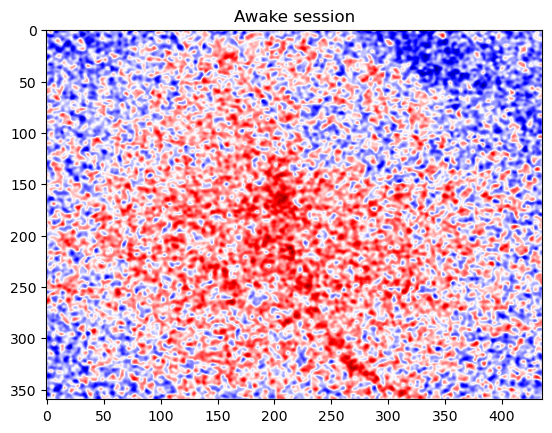

In [47]:
Image=img.gaussian_filter(Awake_ev[11][39], sigma=1.5, mode='constant')

mx, mn = np.max(Image), np.min(Image)
bound = np.max([mx, abs(mn)])
Norm = colors.Normalize(vmax=bound, vmin=-bound)

fig, ax = plt.subplots(1,1)
ax.set_title('Awake session')
ax.imshow(Image,aspect='auto', cmap='seismic', norm=Norm)
plt.show()

In [48]:
#np.save('Awake_vasculature.npy', Image)

In [3]:
Anesth_path = original_data_directory+'signal_240306_blank.mat'
file_anesth_evokedU = h5py.File(Anesth_path)['signal']
Anesth_evk = np.array(file_anesth_evokedU)

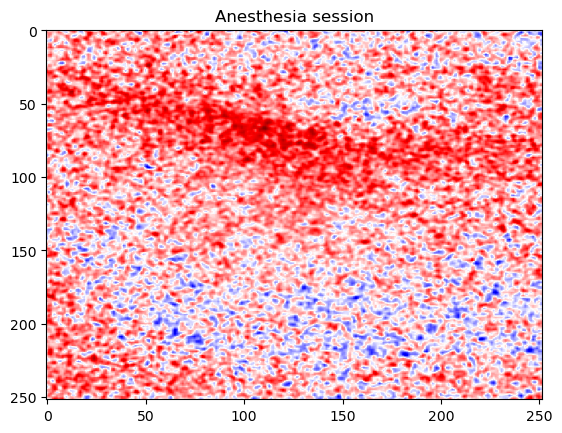

In [104]:
Image2=img.gaussian_filter(Anesth_evk[7][148], sigma=.9, mode='constant')

mx, mn = np.max(Image2), np.min(Image2)
bound = np.max([mx, abs(mn)])
Norm2 = colors.Normalize(vmax=bound, vmin=-bound)

fig, ax = plt.subplots(1,1)
ax.set_title('Anesthesia session')
ax.imshow(np.flipud(Image2),aspect='auto', cmap='seismic', norm=Norm2)
plt.show()

In [105]:
#np.save('Anesthesia_vasculature.npy', Image2)